# Unsupervised Learning(비지도학습)
- Clustering(군집)
- 독립성분분석(Independent Component Analysis)



## 비지도학습이란?
- 자율학습이라고도 불리고, 데이터 라벨링 작업 비용이 과다하여 라벨링이 되어있지 않은 데이터들을 학습하기 위해 사용하는 방법이다.
  - 라벨링이 되어있으면 Classfication 방법을 통해 학습하는것이 좋다.

## Clustering(군집)
- K-means Clustering
- 계층적 군집(Hierarchical Clustering)
- Point assignment clustering
---
### - Wine 데이터셋을 이용한 clusterng 실습

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 간단한 경고 메시지 필터링 무시 명령어

import os
from os.path import join

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
data = wine.data
label =  wine.target
columns  = wine.feature_names

data = pd.DataFrame(data, columns=columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
from sklearn.preprocessing import MinMaxScaler    # 데이터 전처리, Min-Max 스케일링을 통해 데이터의 평균치를 맞춰준다.
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

In [7]:
from sklearn.decomposition import PCA         # PCA를 이용한 차원의 축소
pca = PCA(n_components=2)
data = pca.fit_transform(data)
print(data[:5])
print(data.shape)

[[-0.70633576 -0.25319275]
 [-0.4849768  -0.00882289]
 [-0.52117227 -0.18918722]
 [-0.82164366 -0.58090551]
 [-0.20254638 -0.05946657]]
(178, 2)


## K-means Clustering

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)     # n_clusters = 와인데이터 3가지 집합으로 되있는걸 알고있기 때문에 3을 넣었음
                                                  # 몇가지 집합으로 나눠져있는지 지정

kmeans.fit(data)                            # 비지도학습이기때문에 학습용 데이터, 테스트용 데이터 이런식으로 입력시킬 필요없이 바로 데이터 입력

KMeans(n_clusters=3)

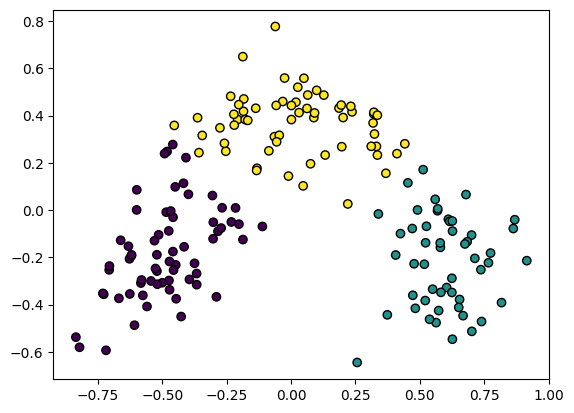

In [12]:
cluster = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=cluster, linewidth=1, edgecolor='black')
# plt.scatter(X좌표, y좌표, 군집별로 다른 색, 점외곽선, 외곽선색)

## Hierarchical Clustering
- Single Linkage
- Complete Linkage
- Average Linkage
  - 클러스터의 개수를 지정해줄 필요가 없다.
  - 결과를 보고 rate 조정 가능
- Dendrogram
---
### - Single Linkage
- 두 클러스터 내 가장 가까운 점 사이의 거리

In [14]:
from scipy.cluster.hierarchy import single
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')

single_clustering.fit(data)
single_cluster = single_clustering.labels_
single_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

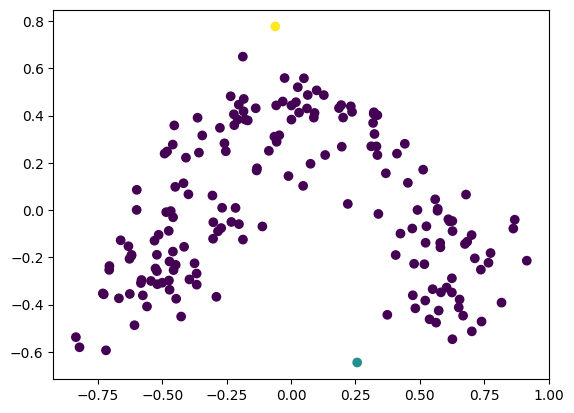

In [15]:
plt.scatter(data[:, 0], data[:, 1], c=single_cluster)

### - Complete Linkage
- 두 클러스터 내의 가장 먼 점 사이의 거리

In [16]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_clustering.fit(data)
complete_cluster = complete_clustering.labels_
complete_cluster

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

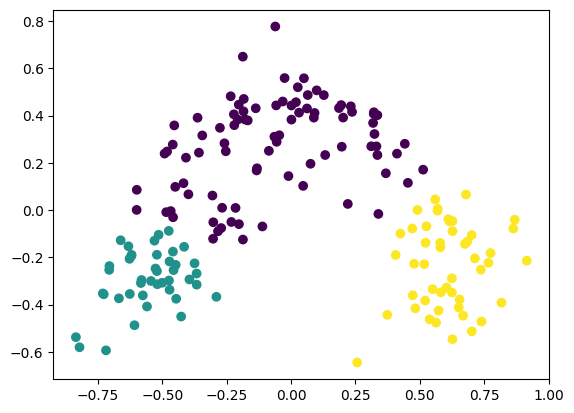

In [17]:
plt.scatter(data[:, 0], data[:, 1], c=complete_cluster)

### - Average Linkage
- 두 클러스터 내의 모든 점 사이의 평균 거리

In [18]:
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
average_clustering.fit(data)
average_cluster = average_clustering.labels_
average_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

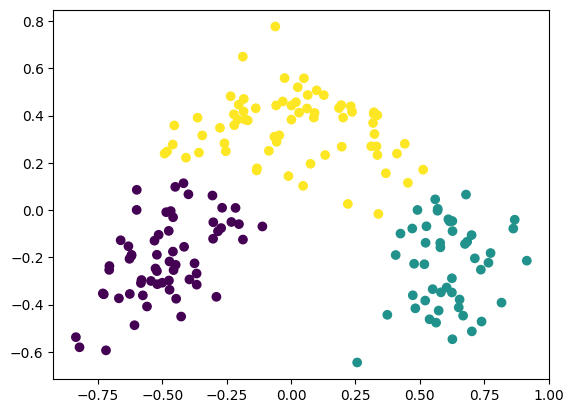

In [19]:
plt.scatter(data[:, 0], data[:, 1], c=average_cluster)

# 덴드로그램 (Dendrogram) 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [120.0, 120.0, 166.25, 166.25],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [195.0, 195.0, 220.0, 220.0],
  [143.125, 143.125, 207.5, 207.5],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [272.5, 272.5, 300.0, 300.0],
  [250.0, 250.0, 286.25, 286.25],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [322.5, 322.5, 352.5, 

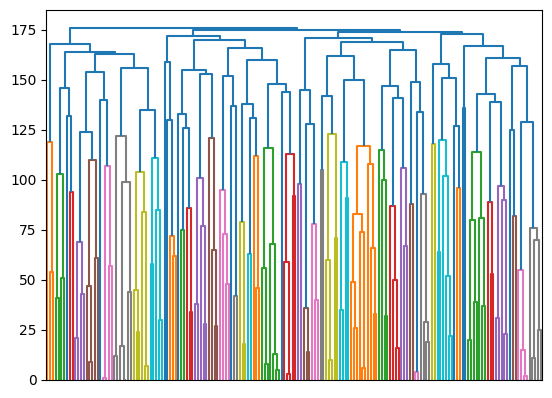

In [20]:
from scipy.cluster.hierarchy import dendrogram
# scipy = 과학적인 수식이나 연산을 위한 기능을 가진 패키지

# Hierarchical Cluster의 자식 노드
children = complete_clustering.children_  # 내부적으로 가지고 있는 정보들은 끝에 언더바를 붙이는게 관행

distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램 그리기
dendrogram(linkage_matrix, p = len(data), labels = complete_cluster, show_contracted=True, no_labels=True)

#### 실루엣
- 클러스터 안의 데이터들이 다른 클러스터값과 비교해서 얼마나 비슷한지
- 같은 클러스터 내 간격은 가까울수록 밀도가 높아 데이터의 특성이 잘 표현된다
- 다른 클러스터와의 간격은 멀 수록 데이터의 특성이 잘 표현된다.
- 전체적 거리개념, 데이터의 밀집들을 표현한 지표가 실루엣이다.

In [25]:
from sklearn.metrics import silhouette_score

best_n = -1
best_score = -1                                             # 확실한 변별력을 확인하기 위해 기본값을 -1로 설정해준다.(관행)

for n_cluster in range(2, 11):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(data)
  cluster = kmeans.predict(data)

  # 실루엣 점수를 확인
  score = silhouette_score(data, cluster)

  print('Cluster count : {}, Silhouette Score : {:.2f}'.format(n_cluster, score))

  if score > best_score:
    best_n = n_cluster
    best_score = score
print('\n------------------------------------------\n')
print('Best n_cluster : {}, Best score : {:.2f}'.format(best_n, best_score))

Cluster count : 2, Silhouette Score : 0.49
Cluster count : 3, Silhouette Score : 0.57
Cluster count : 4, Silhouette Score : 0.49
Cluster count : 5, Silhouette Score : 0.46
Cluster count : 6, Silhouette Score : 0.42
Cluster count : 7, Silhouette Score : 0.39
Cluster count : 8, Silhouette Score : 0.38
Cluster count : 9, Silhouette Score : 0.40
Cluster count : 10, Silhouette Score : 0.39

------------------------------------------

Best n_cluster : 3, Best score : 0.57


# Docker
- Containerization : 컨테이너를 만드는 기술(OS, 환경, 실행파일, 라이브러리, 앱 등등 이 들어감)
- Full OS가 들어가는게 아닌, 각 버전만의 차이점만이 들어가게된다.
- 환경이 안맞으면 실행이 안되기 때문에 환경을 맞춰주기 위해 사용한다.
- 리눅스 기반에서는 기본적으로 OS에 대한 버전들이 미세하게 틀리다.
  > OS 종류는 CentOS, RedHat, Oracle linux, Demian 등등
- 실제 실행파일들은 바이너리, 라이브러리 등 이 조금씩 다 틀리다.
- 이러한 점들을 잘 풀어내기 위해서 Docker 기술이 시작되었음.
- 컨테이너는 작고 가볍기 때문에 개발자가 좋은 테스트결과의 모델파일이나 개발환경 등을 컨테이너로 만들어 서버에 배포할 수 있게 된다.
- 서버 안에 도커 이미지(바이너리, 라이브러리 등이 파일 형태로 존재)
- 도커 파일은 점점 사이즈가 커지면 감당이 안된다.
- 도커 이미지파일이 이미 하나 있으면 그 이미지파일이 도커 베이스 이미지가 된다.
- 도커 이미지는 차곡차곡 쌓인다.
- 서버에 도커 이미지가 있으면 서버에 있는 도커 이미지를 제외한 나머지 생성 컨테이너만 서버에 배포가 된다.
- 이미지, 컨테이너별로 고유번호를 비교하며 서버에 중복되는 대상을 제외한 나머지 배포대상을 배포하게된다.

## Container Repository
개발pc에서 개발환경을 만들고 컨테이너를 만들어 실제 서버로 보내야하는데 다이렉트로 보내는게 아니라 받는측과 보내는측 둘다 준비가 되어있어야함.
이 중간에 Container Repository가 있어 배포하는 측에서 컨테이너를 레포지토리에 저장하고 서버에서는 레포지토리에 저장된 컨테이너를 다운받아 운용하는 방식이다.
- 레포지토리는 로컬, 별도의 클라이언트나 서비스에서 구현 가능
- Azure Container Repository(ACR) 서비스 이용가능
- 오픈소스를 공유하는 Github처럼 Dockerhub도 있음, 데이터 공유 가능
---

## 가상화 기술
- 한 대의 서버에 여러 개의 가상머신을 작동시키는 기술
- 외부 사람들은 독립적인 컴퓨터를 사용하는것처럼 받아들이지만 실제로는 물리적인 하나의 서버를 쪼개서 사용하는 개념
  > 이 기술을 극적으로 발전시킨 형태가 클라우드 기술이다.
- 하이퍼바이저 : hyper-v(윈도우), VMware, VirtureBOX, XEN project, KVM 등등이 있음
- 하이퍼바이저 위에 가상머신 위에 게스트 OS 서버 위에 서버가 운용되면서 이중으로 용량이 낭비되는 경우 가상화 기술을 통해 자원을 좀더 효율적으로 사용가능
  > ex) 웹서버 하나의 용량에 트래픽이 몰리지않는이상 평균적으로 28퍼정도의 자원을 사용하는데 한 대의 서버에서 가상머신을 통해 웹서버 여러개를 만드는게 가능하니 훨씬 더 효율적이고 상대적으로 환경적이다.

### 그리드 컴퓨팅
- 다수의 컴퓨터를 네트워크를 통해 연결시켜 묶어 큰 하나의 컴퓨터처럼 만드는 기술

### 클라우드 컴퓨팅
- 그리드 컴퓨팅 + 가상화 기술을 통해 필요한 수만큼의 가상머신을 제공하는 기술

### 서비스 생성 시 알아야할 점
- ex) ubuntu 20.04에 웹서버 설치, 데이터베이스는 ubuntu 22.04에서 MySQL을 사용하고자 할 때 도커 이미지 생성,
  > 실제 사용시 웹서버 이미지를 도커에서 실행, DB 이미지도 따로 만들어 웹서버 이미지에서 DB서비스에 붙어서 사용

### 쿠버네티스
- 서비스와 컨테이너가 늘어나며 발생하는 도커 이미지와 도커 컨테이너 관리를 자동으로 하는 프로그램
---
# Linux
- 최고 권한자 : Superuser
- apt-get : ubuntu 서버 관리 시스템
- apt-get update : 업데이트
- 명령 뒤 --help : 명령 사용법
- 도구 --version : 도구의 버전
- ps : 메모리상 실행되고 있는 프로세스 목록
  - PID 프로세스마다 부여되는 고유번호 : 이거 확인하고 이것만 죽일수있음
  - TTY = 터미널
- 실행중인 프로그램들을 윈도우에선 서비스
  - 리눅스/유닉스에선 데몬(Daemon).
---

## Docker 관련 Linux 명령어

- sudo usermod -a -G docker $USER : 일반 사용자권한을 가진 유저들한테 도커를 사용할 수 있게 하는 명령어

- sudo service docker restart : 도커 서비스 재시작

- docker run hello-world : 도커실행, hello world 실행, 로컬 탐색 후 hello world 이미지 없으면 레포지토리가 연결되있는 경우 hello world 이미지를 다운받아 실행

- docker pull : 이미지만 가져오기 

- docker pull ubuntu:18.04 : ubuntu 이미지, : 뒷부분이 태그
  > (태그쪽에 버전 안적으면 이미지의 latest 버전 설치됨)

- docker images : 로컬에 설치되어있는 도커 이미지 확인

- docker ps -a : 실행했었던 도커 이미지 목록

- docker run --name demo1 -it ubuntu:18.04 /bin/bash : demo1 이름의 ubuntu:18.04 /bin/bash 환경의 도커 이미지 실행.
  > -it : interective terminal : 대화형 터미널, 해당되는 도커에 붙어서 실제로 명령어를 칠수있게끔 해주는 옵션

- docker run -it -d --name demo2 ubuntu:18.04 : demo2라는 이름의 이미지를 계속 실행해놔줘
  >  -d = Daemon의 약자,

- docker exec -it demo2 /bin/bash : 실행중인 데몬 demo2를 배쉬셸 커맨드창을 통해 실행

- docker logs '이미지명' : 로그 확인(도커 이미지에서 어떤 문제가 있는지 추적확인가능)
  > 서비스에 어떤 문제(시스템이상, 시스템 침입자, 예상치못한동작) 발견시 로그확인을 통해 해결책 제시가능
  > -f : 지속적으로 로그확인(팔로우 모드, 와치 모드라고도 불림)

- docker run --name demo3 -d busybox sh -c "while true;do $(echo date);sleep 1;done" : 1초에 한번씩 날짜값을 찍는다.
  > busybox라는 이미지 다운하고 "while~do~done" 사이 내용 반복하는 쉘 명령 부여 -> 탈출코드를 넣지 않으면 무한반복
do 뒤의 실행코드 실행하고 sleep 1 = 1초 간 쉬어라.

- docker stop 컨테이너명 : 컨테이너 실행중지

- docker rm 컨테이너명 : 컨테이너 지우기

- docker images : 현재 다운로드되어있는 이미지 목록 확인

- docker rmi 이미지명 : 이미지 지우기(컨테이너 전부 지운 후 가능)
  - 가급적이면 태그(버전)도 입력해서 지워줘야함.
---
